In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## Criando o Sistema de Inferência Fuzzy com Python

Diferentemente de Redes Neurais e diferentes áreas de Machine Learning, não existe uma biblioteca tão popular para Sistemas de Inferência Fuzzy. 

Nesta aula, usaremos uma biblioteca chamada **scikit fuzzy**

Seguiremos o mesmo padrão que usamos nas aulas teóricas:

1. Definição das variáveis linguísticas

2. Definição dos conjuntos fuzzy

3. Definição das regras de inferência

4. Definição de outros parâmetros do sistema (defuzzificação, agregação, etc)

In [ ]:
# Definimos o universo de discurso e o nome das variáveis linguísticas.
temp = ctrl.Antecedent(np.arange(0, 101, 0.5), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 0.5), 'humidity')

# Para o consequente, podemos também definir o método de defuzzificação que será utilizado.
velocity = ctrl.Consequent(np.arange(0, 100, 0.5), 'velocity', defuzzify_method='mom')

In [ ]:
# Definindo funções de pertinência para a temperatura
temp['muito_fria'] = fuzz.trapmf(temp.universe, [-1, 0, 10, 25])
temp['fria'] = fuzz.trimf(temp.universe, [10, 25, 50])
temp['confortavel'] = fuzz.trimf(temp.universe, [25, 50, 60])
temp['quente'] = fuzz.trimf(temp.universe, [50, 60, 70])
temp['muito_quente'] = fuzz.trapmf(temp.universe, [60, 70, 100, 100])

c:\Users\thiag\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


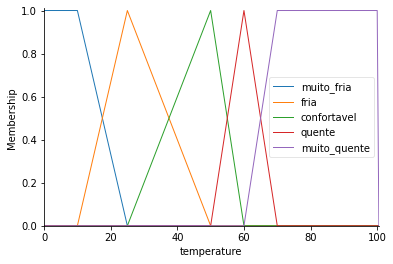

In [ ]:
temp.view()

Podemos definir os conjuntos fuzzy de forma automática (evenly spaced)

c:\Users\thiag\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


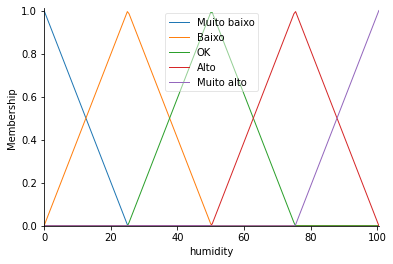

In [ ]:
humidity.automf(5, names=['Muito baixo','Baixo','OK','Alto','Muito alto'])
humidity.view()

In [ ]:
# Definindo funções de pertinência para a velocidade da ventoinha
velocity['baixa'] = fuzz.trimf(velocity.universe, [0, 0, 50])
velocity['média'] = fuzz.trimf(velocity.universe, [0, 50, 100])
velocity['alta'] = fuzz.trimf(velocity.universe, [50, 100, 100])


In [ ]:
# Definindo regras
regra1 = ctrl.Rule(temp['muito_fria'] & humidity['Baixo'], velocity['alta'])
regra2 = ctrl.Rule(temp['fria'] & humidity['Baixo'], velocity['média'])
regra3 = ctrl.Rule(temp['confortavel'] & humidity['OK'], velocity['média'])
regra4 = ctrl.Rule(temp['quente'] & humidity['Alto'], velocity['baixa'])
regra5 = ctrl.Rule(temp['muito_quente'] & humidity['Alto'], velocity['baixa'])

In [ ]:
# Criando o sistema de controle
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5])
controle = ctrl.ControlSystemSimulation(sistema_controle)

In [ ]:
# Definindo as entradas de temperatura e umidade
controle.input['temperature'] = 75
controle.input['humidity'] = 70

In [ ]:
# Realizando a inferência
controle.compute()

# Obtendo a saída
print("Velocidade da Ventoinha:", controle.output['velocity'])

Velocidade da Ventoinha: 17.295014001033095


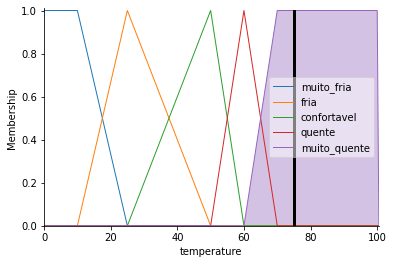

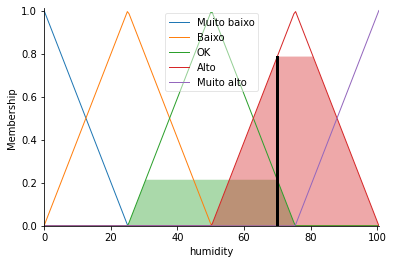

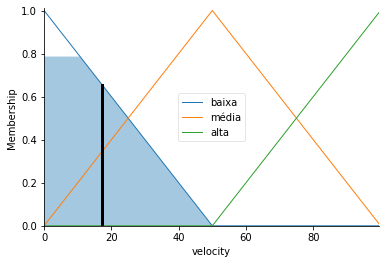

In [ ]:
# Visualização dos resultados
temp.view(sim=controle)
humidity.view(sim=controle)
velocity.view(sim=controle)

Para o Sistema de Inferência Fuzzy, devemos definir minimamente:

* As variáveis linguísticas e os respectivos universos de discurso.

* Os conjuntos fuzzy associados à cada variável linguística.

* Regras de Inferência.

### Passo 1: Definindo as variáveis de entrada e saída.

Neste caso, vamos considerar as seguintes variáveis para o problema:

* Antecedentes: Idade, Experiência, Valor do carro.

* Consequente: Valor da apólice de seguro.

In [4]:
# Antecedentes
valor_carro = ctrl.Antecedent(np.arange(0, 100000, 1), 'Valor do Carro')
idade_solicitante = ctrl.Antecedent(np.arange(18, 65, 1), 'Idade do Solicitante')
experiencia_solicitante = ctrl.Antecedent(np.arange(0, 65, 1), 'Experiência do Solicitante')

# Consequentes
valor_seguro = ctrl.Consequent(np.arange(0, 10001, 1), 'Valor do Seguro')

Perceba que a sintaxe para a criação dos conjuntos fuzzy é bem tranquila. Basicamente precisamos dizer qual é o tipo de FP e quais são os parâmetros.

In [6]:
valor_carro['baixa'] = fuzz.trapmf(valor_carro.universe, [0, 0, 10000, 20000])
valor_carro['média'] = fuzz.trimf(valor_carro.universe, [10000, 20000, 40000])
valor_carro['alta'] = fuzz.trapmf(valor_carro.universe, [20000, 40000, 100000, 100000])

Se quisermos verificar os conjuntos gerados, podemos usar o método `view`

In [ ]:
valor_carro.view()

Vamos fazer o mesmo procedimento para as outras variáveis linguísticas.

In [13]:
idade_solicitante['jovem'] = fuzz.trimf(idade_solicitante.universe, [18, 25, 35])
idade_solicitante['adulto'] = fuzz.trimf(idade_solicitante.universe, [30, 40, 50])
idade_solicitante['idoso'] = fuzz.trimf(idade_solicitante.universe, [45, 60, 65])

idade_solicitante['jovem'] = fuzz.trimf(idade_solicitante.universe, [18, 25, 35])
idade_solicitante['adulto'] = fuzz.trimf(idade_solicitante.universe, [25, 35, 50])
idade_solicitante['idoso'] = fuzz.trapmf(idade_solicitante.universe, [35, 50, 65, 80])

experiencia_solicitante['pouca'] = fuzz.trapmf(experiencia_solicitante.universe, [0, 0, 2, 4])
experiencia_solicitante['alguma'] = fuzz.trimf(experiencia_solicitante.universe, [2, 4, 6])
experiencia_solicitante['muita'] = fuzz.trapmf(experiencia_solicitante.universe, [4, 6, 65, 65])

valor_seguro['baixo'] = fuzz.trapmf(valor_seguro.universe, [0, 0, 1000, 2000])
valor_seguro['médio'] = fuzz.trimf(valor_seguro.universe, [1000, 2000, 4000])
valor_seguro['alto'] = fuzz.trapmf(valor_seguro.universe, [2000, 4000, 10000, 10000])


In [14]:
# Define as regras fuzzy
regra1 = ctrl.Rule(idade_solicitante['jovem'] | experiencia_solicitante['pouca'], valor_seguro['alto'])
regra2 = ctrl.Rule(idade_solicitante['adulto'] & experiencia_solicitante['alguma'], valor_seguro['médio'])
regra3 = ctrl.Rule(experiencia_solicitante['muita'], valor_seguro['baixo'])
regra4 = ctrl.Rule(valor_carro['baixa'], valor_seguro['baixo'])
regra5 = ctrl.Rule(valor_carro['média'], valor_seguro['médio'])
regra6 = ctrl.Rule(valor_carro['alta'], valor_seguro['alto'])
regra7 = ctrl.Rule(idade_solicitante['idoso'] & experiencia_solicitante['alguma'], valor_seguro['médio'])

# Cria o sistema de controle fuzzy
sistema_fuzzy = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7])

# Cria o simulador
simulador = ctrl.ControlSystemSimulation(sistema_fuzzy)

In [36]:
# Defina os valores de entrada

simulador.input['Experiência do Solicitante'] = 8
simulador.input['Valor do Carro'] = 25000  
simulador.input['Idade do Solicitante'] = 28

In [37]:
# Avalie o sistema
simulador.compute()

In [38]:
# Obtenha o valor do financiamento
valor_do_financiamento = simulador.output['Valor do Seguro']

print(f'Valor do Seguro: {valor_do_financiamento:.2f}')


Valor do Seguro: 4815.42
